In [1]:
clear all
addpath('./BibliotecaEntrega')
graphics_toolkit ("gnuplot"); %% Comando solo para jupyter notebooks


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


# Entrega de Prácticas 1

Para poder corregir  de forma adecuada, seguiremos el siguiente proceso.

* Se creerá una «Tarea» en el Aula Virtual correspondiente a esta entrega.

* Todos los programas de Octave que crees debes colocarlos en la carpeta Biblioteca, si son de propósito general, o bien en una carpeta denominada Entrega1 si corresponden a programas que utilizan las funciones incluidas en Biblioteca y que resuelven distintos apartados concretos de la práctica.

* Una vez hayas terminado tu trabajo, debes crear un archivo zip de tu carpeta de trabajo con Octave y de forma que contenga al menos las dos carpetas anteriores. Si quieres incluir algún archivo de texto o pdf con comentarios u otras cuestiones puedes hacerlo en el mismo zip. También puedes incluir los comentarios en los scripts de Octave o en la casilla destinada para ellos en el envío de la tarea del Aula Virtual.

* Finalmente debes subir este archivo *.zip* a la Tarea de Aula Virtual.


<span style="color: orange;">
Fecha de inicio: 11 de noviembre de 2022

Fecha de entrega: 10 de diciembre de 2022

</span>
<span style="color: cyan;">

Se valorarán muy positivamente los comentarios y observaciones acerca de los ejercicios realizados y de los resultados numéricos y gráficos obtenidos, naturalmente siempre que sean adecuados y correctos. También se valorará muy positivamente la eficiencia del código, en particular el uso del cálculo en forma vectorial para el que Octave está muy bien adaptado.

</span>


## Introducción

El objetivo general de esta práctica es la experimentación con el cálculo del polinomio interpolador
en sus distintas formas, y en particular, la estabilidad de la evaluación de dicho polinomio. En el último
ejercicio haremos una experiencia acerca de cómo pueden afectar los errores de redondeo de los datos a
los resultados finales (seguimos, por tanto, en torno al problema de la estabilidad).

A estas alturas tenemos a nuestra disposición (en teoría) varias formas de calcular y evaluar un
polinomio interpolador. Esta formas son (en términos generales):

* Calcular los coeficientes del polinomio en su forma de Newton y evaluarlo mediante el método de Horner.

* Calcular los coeficientes de la forma de Lagrange (que es un polinomio escrito en la forma habitual $a_nx^n + ... + a_1x + a_0)$ y evaluarlo mediante el método de Horner.

* Evaluar directamente el polinomio mediante la forma de Lagrange.

La primera de las formas anteriores ya es conocida y ya la tenemos programada; ha sido la forma habitual de cálculo, hasta ahora. El primer ejercicio (ya iniciado en la práctica 4) tiene por objetivo implementar en Octave el segundo procedimiento. El tercer procedimiento lo implementaremos en el segundo ejercicio, a través de la conocida como «fórmula baricéntrica» para el polinomio de Lagrange.


## Ejercicio 1

Este ejercicio es prácticamente idéntico al ejercicio 3 de la práctica 4: sólo hay pequeños cambios en el enunciado, aparte del cambio de numeración del mismo y de sus scripts: sólo tienes que copiar a la carpeta **/Entrega1**, o a **/Biblioteca**, los scripts o funciones que ya tienes realizados, cambiándoles la numeración y completando los pequeños cambios.

### Apartado a)

Escribe una función denominada **factLagrange.m**, que guardaras en */Biblioteca*, que realice la tarea siguiente: a partir de su único argumento **x**, que es el vector de nodos de interpolación $(x = \{x_0, . . . , x_n\})$, devuelve una matriz cuya fila k-ésima contiene los coeficientes del factor de Lagrange (k = 0, . . . , n): 

$$L_k(x) = \prod ^{n}_{j = 0 j\neq k}\frac{x-x_j}{x_k -x_j}$$

Para facilitar la tarea usaremos la función de Octave **conv(p,q)** que devuelve el polinomio producto de los polinomios _*p*_ y _*q* _(¡recuerda cómo se representan los polinomios en Octave!).

#### Solución:

Recordamos que los polinomios se representan en octave a través de sus coeficientes ordenados de mayor a menor grado.

In [2]:
%% /Biblioteca/factLagrange.m

function ret = factLagrange(x)

    matriz = zeros(length(x), length(x));

    for i=1:length(x)
        p=1;
        for j=1:length(x)
            if j~=i
                c = poly(x(j))/(x(i)-x(j)); % Poly devuleve los coeficientes del polinomio cuyas raíces son el argumento dado, es decir, 
                                            % en este caso poly(x(j)) = 1*x -x(j)*x^0 = [1, -x(j)] en notación de octave.
                p = conv(p,c);
            end
        end
        matriz(i, :) = p;
    endfor
    ret = matriz;
endfunction

In [3]:
% Otra forma de escribir la función anterior.

function ret = PruebaLG (x)
    matriz = zeros(length(x), length(x));

    for i=1:length(x)
        p=1;
        c = poly(x( (1:length(x)) ~= i ));
        matriz(i, :) = c / polyval(c, x(i));
    endfor
    ret = matriz;
endfunction

### Apartado b)

Crea en */Biblioteca* la función **interpolLagrange.m** que espera como argumentos la matriz de coeficientes de los factores de Lagrange y el vector de ordenadas a interpolar, y devuelve los coeficientes del polinomio interpolador en la forma de Lagrange:

$$p(x) = \sum ^{n}_{k=0} y_k L_k(x)$$

#### Solución:

In [4]:
%% /Biblioteca/interpolLagrange.m

function ret = interpolLagrange (matriz, y)

    suma = 0;
    for i=1:length(y)
        term = y(i) * matriz(i, :);
        suma = suma + term;
    endfor

    ret = suma;

endfunction

### Apartado c)

Para verificar que la implementación es correcta: escribe en el script **Ejercicio3_1.m** el cálculo de los coeficientes del polinomio interpolador en los conjuntos de puntos

$$\{(0, 0), (1, 2), (2, 4), (5, 10)\}\quad y \quad\{(0, 0), (1, 1), (2, 8), (3, 27)\}.$$

¿Coinciden exactamente los polinomios que produce el script con los esperados? Si no es así, ¿hay alguna explicación o hay errores en el script?

#### Solución:

El segudo ejemplo si da el polinomio exacto, pero en el primero se añade un coeficiente muy pequeño multiplicando a $x^3$. Este error será provocado por los errores de cálculo de la máquina.

2.7756e-17*x^3 + 0*x^2 + 2*x^1 + 0
1*x^3 + 0*x^2 + 0*x^1 + 0


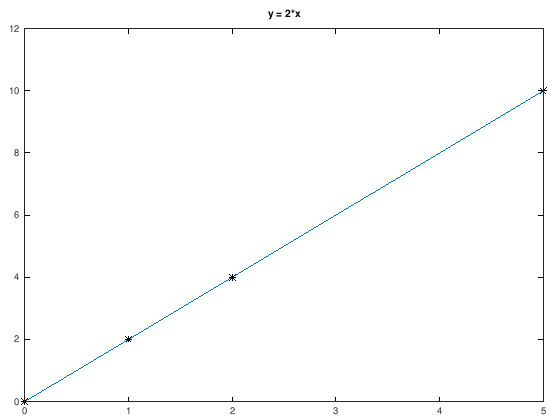

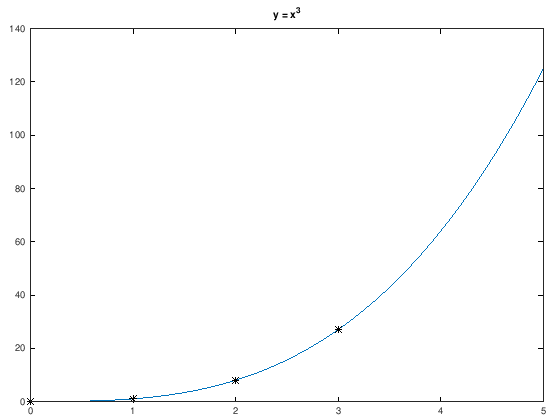

In [5]:
%% Ejercicio3_1.m

clear all

%% Esta fución la he definido para ahorrar líneas de código.
function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

x_1 = [0, 1, 2, 5];
y_1 = x_1 .* 2;

x_2 = [0, 1, 2, 3];
y_2 = x_2 .^ 3;

pol_1 = Lagrange(x_1, y_1);
pol_2 = Lagrange(x_2, y_2);

intervalo = linspace(0, 5, 500);

polyout(pol_1, 'x')
figure(1)
plot(intervalo, polyval(pol_1, intervalo), x_1, y_1, '*', 'color', 'k')
title("y = 2*x")

polyout(pol_2, 'x')
figure(2)
plot(intervalo, polyval(pol_2, intervalo), x_2, y_2, '*', 'color', 'k')
title("y = x^3")

### Apartado c)

Una vez creadas las funciones anteriores disponemos ya del polinomio interpolador en la forma de Lagrange: para evaluarlo en un vector de abscisas, z, utilizaremos la siguiente función de Octave **polyval(p,z)** que devuelve el vector de las evaluaciones del polinomio p en z: este cálculo está implementado
en Octave mediante el método de Horner (así que no vale la pena que lo implementemos nosotros...)

Para comparar los resultados de ambas formas de cálculo utilizaremos la interpolación de la función _sen(x)_ en el intervalo [0, 2π], mediante nodos equidistribuidos: $x_0 = a$, $x_k = a + k\frac{2π}{n}$.

Para esta función sabemos que los polinomios interpoladores $p_n(x)$ convergen uniformemente a *f(x)*, por lo que si aumentamos considerablemente el número de puntos a interpolar deberíamos aproximar más y más a la función...

#### Solución:

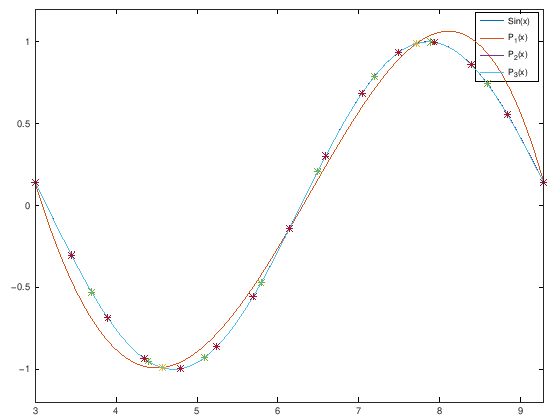

In [6]:
clear all

function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

a = 3;
n = [5, 10, 15];
interval = linspace(0, 2*pi, 500);
interval = interval + a;

figure(1)
plot(interval, sin(interval), ";Sin(x);")
hold on

for i=1:length(n)

    x = linspace(a, 2*pi + a, n(i));
    y = sin(x);

    plot(interval, polyval(Lagrange(x, y), interval), sprintf(';P_%u(x);', i), x, y, '*')

endfor


ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);

### Apartado e)

Crea el script **Ejercicio3_2.m** que para un valor de n realice las tareas siguientes:

* en una primera ventana gráfica incluya las gráficas de *f* y del polinomio interpolador en la forma de Newton;

* en una segunda ventana gráfica incluya las gráficas de *f* y del polinomio interpolador en la forma de Lagrange;

* en otra ventana incluya la gráfica del valor absoluto de la diferencia de los dos polinomios interpoladores;

* nos dé como salida en la ventana de comandos el máximo del valor absoluto de la diferencia anterior (calculado sobre una malla de puntos en el intervalo $[0, 2\pi]$).

Ejecuta el script anterior para distintos valores de n, por ejemplo: 5, 10, 15 y otros mayores, por ejemplo 20, 30, 40. ¿Qué observas? Observa que las diferencias grandes aparecen cerca de los extremos del intervalo, ¿tiene esto que ver con el fenómeno de Runge? Comenta lo que consideres adecuado sobre la estabilidad de los cálculos en una u otra forma.

#### Solución:

error_Newton_max = 7.2219e-05
error_Lagrange_max = 7.2219e-05


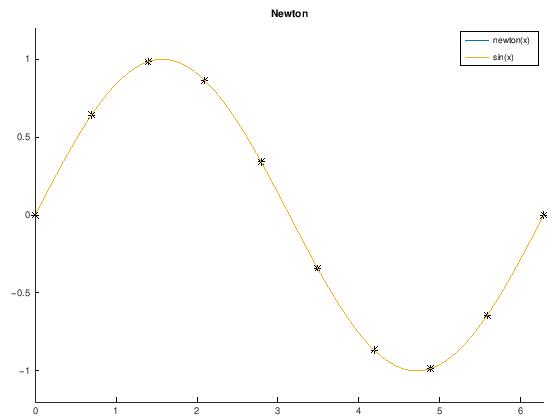

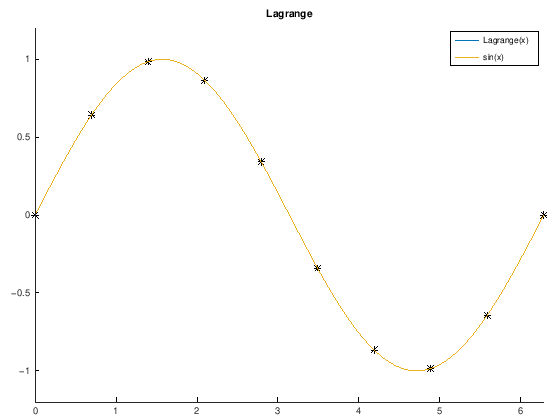

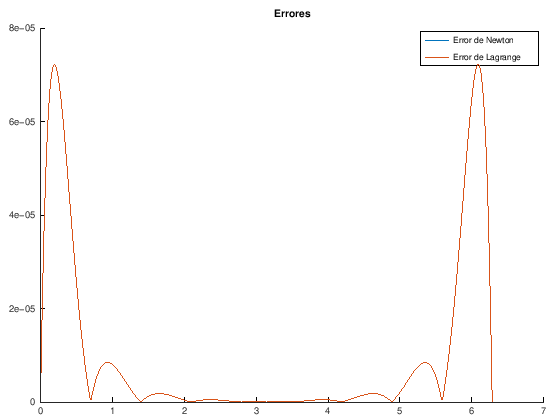

In [7]:
% Ejercicio3_2.m

clear all

function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

n = 10;
a = 0;

x = linspace(0 + a, 2*pi + a, n);
y = sin(x);

interval = linspace(0 + a, 2*pi + a, 500);

figure(1)
title("Newton")
hold on
coef = interpolNewton(x, y);
evalNetown = polyinterpolador_eval(coef, x, interval);
plot(interval, evalNetown, ";newton(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(2)
title("Lagrange")
hold on
evalLagrange = polyval(Lagrange(x, y), interval);
plot(interval, evalLagrange, ";Lagrange(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(3)
title("Errores")
hold on
error_newton = abs(evalNetown - sin(interval));
plot(interval, error_newton, ";Error de Newton;")
error_Newton_max = max(error_newton)

errorLagrange = abs(evalLagrange - sin(interval));
plot(interval, errorLagrange, ";Error de Lagrange;")
error_Lagrange_max = max(errorLagrange)

## Ejercicio 2:

Como has podido comprobar, el procedimiento empleado en el ejercicio anterior para la evaluación del polinomio de Lagrange es inestable para valores de *n* no demasiado grandes. En este ejercicio vamos a implementar una forma de evaluación mucho más estable: se trata de utilizar la llamada forma baricéntrica para el polinomio de Lagrange.

He aquí un breve cálculo que permite obtener dicha forma. El polinomio de Lagrange es $p(x) = \sum _{i=0}^{n} y_i L_i(x)$, siendo $L_i$, para $i = 0,... , n$, los factores de Lagrange. Escribamos

$$w_n(x) = \prod _{j=0} ^{n} (x -x_j) \quad \text{y} \quad \lambda _i^n = \prod _{j=0, j\neq i} ^n \frac{1}{x_i - x_j}$$

Observa que $L_i(x) = \frac{\lambda _i^n}{x - x_i} w_n(x)$ para $x$ distinto de todos los nodos $x_i$. Entonces podemos escribir

$$p(x) = \sum _{i=0}^n y_iL_i(x) = \sum _{i=0}^n y_i \frac{\lambda _i^n}{x - x_i} w_n(x)$$

que es válido pata todo $x$ distinto de los nodos $x_i$. Ahora, utilizando que $\sum _{i=0}^n L_i(x) = 1$ para todo $x \in \mathbb{R}$, tenemos

$$p(x) = \frac{\sum _{i=0}^n y_i \frac{\lambda _i^n}{x - x_i}w_n(x)}{\sum _{i=0}^n \frac{\lambda _i^n}{x - x_i}w_n(x)} = \frac{\sum _{i=0}^n y_i \frac{\lambda _i^n}{x - x_i}}{\sum _{i=0}^n \frac{\lambda _i^n}{x - x_i}} \quad \quad (\textcolor{red}{1})$$

que es la fórmula fórmula baricéntrica buscada (se denomina así de forma un poco abusiva, porque es una combinación lineal de los valores $y_i$ con coeficientes que suman 1, aunque no es una combinación convexa porque dichos coeficientes pueden ser negativos).

El objetivo del ejercicio es implementar esta forma de evaluación y compararla con las otras dos foramas de las que ya disponemos.

Para implementar esta forma de cálculo vamos a escribir un algoritmo eficiente (merece una reflexión para convencerse de que lleva a cabo el proceso requerido). Observemos que para $k \geq 1$ se tiene:

$$\lambda _i^k = \frac{\lambda _i ^{k-1}} {x_i - x_k}, \quad i= 0, 1,..., k-1$$

entonces el algoritmo consiste en la construcción de la siguiente matriz triangular $(\lambda _i^k), i = 0,...,k-1; k=0,1,...,n$ construida de la forma siguiente:

* $\lambda _0^0 = 1$.

* Para $k = 1, 2,...,n$,

$$\lambda _i^k = \frac{\lambda _i ^{k-1}} {x_i - x_k}, \quad i= 0, 1,..., k-1$$

$$\lambda _k^k = \frac {1}{\prod _{j=0}^{k-1}(x_k -x_j)}$$

Observa que los $\lambda _i^k$ para $i=0,...,k-1$ se calculan de forma recurrente, mientras que los $\lambda _k^k$ se calculan directamente.

Una vez calculados los $\lambda _i^n$ (los elementos de la última columna de la matriz) ya se puede proceder a la evaluación de la expresión de la derecha en la formula (<span style="color: red;">1</span>).

Observa que: el número de operaciones total es similar al necesario para evaluar el polinomio interpolador en la forma de Newton y, además, este procedimiento permite añadir un nodo más al proceso de interpolación sin necesidad de recalcular todo, basta añadir una columna a la matriz $\lambda _i^k$ (concretamente
calcular $\lambda _0 ^{n+1} ,..., \lambda _{n+1}^{n+1}$) y recalcular parte de la expresión en (<span style="color: red;">1</span>).

### Apartado a)

---

Crea en la carpeta **/Biblioteca** una función denominada **polyLagrange_eval(x,y,s)** que reciba como variables: el vector de nodos (**x**), el vector de ordenadas (**y**), y el vector de puntos donde
se evaluará el polinomio (**s**). La función debe devolver el vector de evaluaciones del polinomio en las componentes de **s** utilizando el algoritmo anterior. ***Importante: lee la Nota al final del ejercicio.***

> ***Nota*** : La forma baricéntrica no tiene sentido al evaluar el polinomio en un punto $x$ igual a alguno de los nodos, es decir, si $x = x_i$ para algún $i \in \{ 0, . . . , n \}$, pues en la fórmula se debe dividir por $x − x_i$. Si no se toma ninguna precaución es posible que los gráficos tengan algún hueco, pues si alguna componente de **s** coincide con alguna componente de $x$ el valor calculado en esa componente será *NaN* (o quizás *Inf*). Esto no es un problema para la gráfica, pues en esos valores no se dibuja (lo que puede dar huecos muy pequeños si s es una malla suficientemente fina). Quizás sí podría afectar al cálculo de los máximos de las diferencias (si el valor en algún punto es *Inf* ). 
>
> Puesto que en los nodos sabemos el valor del polinomio interpolador, se le podría asignar este valor en la componente adecuada de **s**, en caso de coincidir... el problema es que entonces deberíamos hacer una gran cantidad de condicionales *if*... (para comprobar si alguna componente de s coincide con algún nodo), a no ser que abordemos este problema de forma vectorial, utilizando la estrategia de la indexación booleana de Octave (recuerda los comentarios al respecto en la práctica 2). Pero esto entraña una cierta dificutad. ***Es totalmente voluntario implementar el código necesario para evitar esta indefinición*** en el caso citado de coincidencia en las abscisas. En cualquier caso, una forma de evitar las coincidencias (salvo en los extremos del intervalo, $0$ y $2\pi$) es hacer una malla de un número de puntos que sea coprimo con el número de nodos.

#### Solución:

La matriz lambda deberá ser de la siguiente manera:

| $\lambda _0^0$ 	| $\lambda _0^1$ 	| ... 	| $\lambda _0^n$ 	|
|----------------	|----------------	|-----	|----------------	|
| $\lambda_1^0$  	| $\lambda _1^1$ 	|     	|                	|
|                	|                	| ... 	|                	|
| $\lambda _n^0$ 	| ...            	|     	| $\lambda _n^n$ 	|

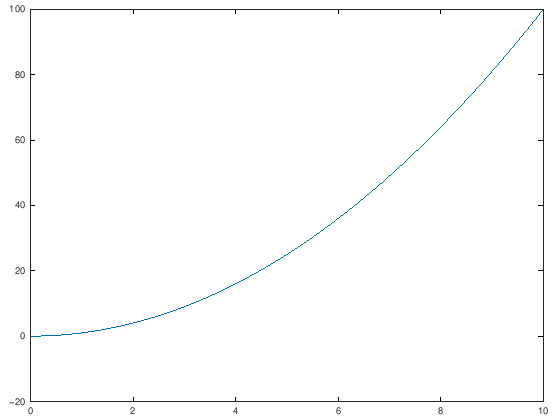

In [8]:
%% /Biblioteca/polyLagrange_eval.m

clear all

function ret = polyLagrange_eval(x, y, s)

    n = length(x);
    
    % Matriz
    lambda = zeros(n, n);
    for i=1:n
        for j=1:n
            if i > j
                lambda(i, j) = 0;
            elseif i == j

                if i == 1
                    lambda(i,j) = 1;
                endif
                if i != 1
                    producto = 1;
                    for k=1:i-1
                        producto = producto * (1 / (x(i) - x(k)));
                    endfor
                    lambda(i,j) = producto;
                endif

            else
                lambda(i,j) = lambda(i, j-1) / (x(i) - x(j));
            endif
        endfor
    endfor

    for i=1:length(s)
        dividendo = 0;
        divisor = 0;
        for j=1:n
            dividendo = dividendo + (y(j) * (lambda(j, n) / (s(i) - x(j))));
            divisor = divisor + (lambda(j, n) / (s(i) - x(j)));
        endfor

        eva(i) = dividendo / divisor;

    endfor

    ret = eva;

endfunction


%% Plot de prueba
x = linspace(1, 10, 10);
y = x.^2;
interval = linspace(0, 10, 500);
evaluacion = polyLagrange_eval(x, y, interval);
plot(interval, evaluacion)

### Apartado b)

Realiza las mismas tareas que en el apartado <span style="color: red;">5</span> del ejercicio anterior (la misma función y los mismos nodos).

Comenta los resultados: ¿hasta qué valores de n parece ahora estable la evaluación? ¿Los errores de cálculo empiezan para valores de n menores en el cálculo de la forma baricéntrica de Lagrange que en la forma de Newton? (haz ensayos con valores grandes de n, del orden 50, 60...)

#### Solución:

Podremos observas que el cálculo es mucho más estable, pues si nos fijamos en el error máximo de Lagrange veremos que no de desorbita con un mayor numero de nodos, como si pasaba con la anterior evaluación del polinomio. Si nos ponemos a probar, veremos que de hecho en este caso esta evaluación de Lagrange es más estable que la evaluación de Newton, pues a partir del orden de los 70, 80 nodos, podemos comprobar que el error máximo de la segunda evaluación mencionada es mayor que el de la primera.

error_Newton_max = 5.2786
error_Lagrange_max = 20.913


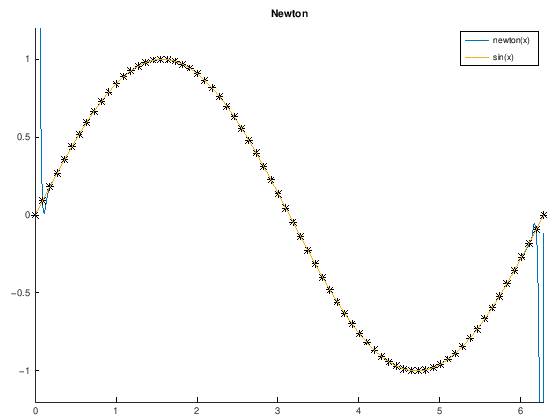

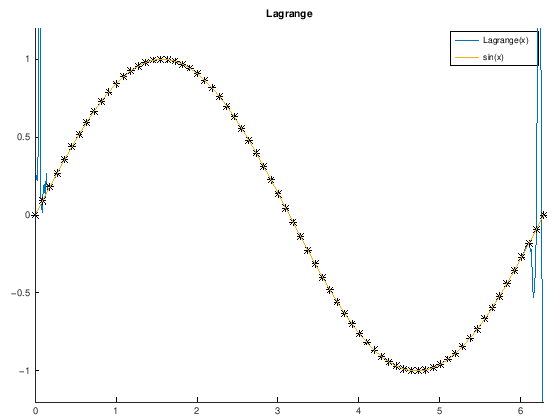

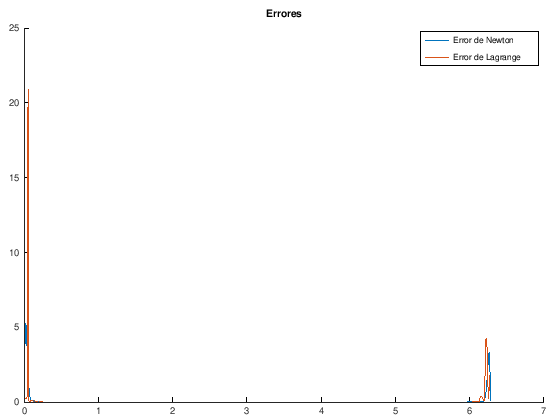

In [9]:
clear all

n = 70;
a = 0;

x = linspace(0 + a, 2*pi + a, n);
y = sin(x);

interval = linspace(0 + a, 2*pi + a, 500);

figure(1)
title("Newton")
hold on
coef = interpolNewton(x, y);
evalNetown = polyinterpolador_eval(coef, x, interval);
plot(interval, evalNetown, ";newton(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(2)
title("Lagrange")
hold on
evalLagrange = polyLagrange_eval(x, y, interval);
plot(interval, evalLagrange, ";Lagrange(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(3)
title("Errores")
hold on
error_newton = abs(evalNetown - sin(interval));
plot(interval, error_newton, ";Error de Newton;")
error_Newton_max = max(error_newton)

errorLagrange = abs(evalLagrange - sin(interval));
plot(interval, errorLagrange, ";Error de Lagrange;")
error_Lagrange_max = max(errorLagrange)

## Ejercicio 3:

Una forma de estudiar la inestabilidad del proceso de interpolación con polinomios de grado elevado es la siguiente. Supongamos que la función exacta que deseamos interpolar es $f(x)$ y sea  $\tilde{f}(x)$ la función calculada efectivamente, que está afectada por errores de redondeo. Supondremos que $\Vert f - \tilde{f}\Vert _{ \infty } < \varepsilon _0$ (por ejemplo, $\varepsilon _0$ puede ser un múltiplo fijo del épsilon de la máquina...)

Si $p(x) = \sum _{i=0}^n f(x_i) L _i(x)$ es el polinomio interpolador de Lagrange, $\tilde{p}(x) = \sum _{i=0}^n \tilde{f}(x_i) L _i(x)$ será el polinomio real que calcularemos, y podremos escribir

$$\vert f(x) - \tilde{p}(x) \vert \leq \vert f(x) - p(x) \vert + \vert p(x) - \tilde{p}(x) \vert .$$

En la expresión anterior el primer sumando es el error de aproximación por interpolación, que ya conocemos teóricamente, mientras que el segundo es el error debido al redondeo y que ahora pretendemos estimar.

Es fácil obtener:

$$\vert p(x) - \tilde{p}(x) \vert = \vert \sum _{i=O}^n (f(x_i) - \tilde{f}(x_i))L_i(x) \vert \leq \varepsilon _0 \sum _{i=0}^n \vert L_i(x) \vert \leq \varepsilon _0 \sum _{i=0}^n \Vert L_i \Vert _{\infty}$$

Por tanto la función $\varLambda _n(x) = \sum _{i=0}^n \vert L_i(x) \vert$ y el número $M_n = \sum _{i=0}^n \Vert L_i \Vert _{\infty}$ (que suelen denominarse *función* y *número de Lebesgue*) nos proporcionan una vía para estudiar la inestabilidad del proceso.

En este ejercicio vamos a evaluar las funciones $\varLambda _n$ y el número $M_n$, para distintos valores de n. Así mismo estudiaremos experimentalmente cómo crecen estos valores con n y trataremos de comprobar a través de un modelo sencillo si las estimaciones sobre los errores de redondeo anteriores son ratificadas por la práctica.

> _**Observación:**_ Para calcular correctamente $\varLambda _n(x)$ o $M_n$ deberíamos usar el procedimiento baricéntrico del ejercicio anterior, pero eso significaría reprogramarlo, puesto que necesitamos los valores de $\sum _{i=0}^n \vert L_i(x)\vert$, no los de $\vert \sum _{i=0}^n L_i(x)\vert$. Puesto que no vamos a elegir valores grandes de n utilizaremos las funciones del ejercicio 1 para estos cálculos: después de ese primer ejercicio estamos más o menos tranquilos, puesto que esperamos que el cálculo de los factores de Lagrange no genere grandes problemas de inestabilidad para los valores de n que utilizaremos en este ejercicio.

### Apartado 1:

Crea en la carpeta **/Biblioteca** una función **lebesgue(nodos,z)**, donde la variable nodos es el
vector de nodos y z es un vector de puntos donde evaluaremos la función de Lebesgue. Esta función
debe devolver el vector de evaluaciones, en z, de la función $\varLambda _n(x) = \sum _{i=0}^n \vert L_i(x) \vert$ correspondiente a los nodos y el número $M_n = \sum _{i=0}^n \Vert L_i \Vert _{\infty}$. Para realizar estos cálculos utilizaremos:

- la función ya progamada **factLagrange** para la evaluación de $\varLambda _n$, y

- los máximos $\Vert L_i \Vert _{\infty}$ se calcularán experimentalmente, tomando el máximo de $\vert L_i \vert$ evaluado en el vector de puntos z.

El vector de puntos a evaluar z debe tener al menos 500 componentes (puesto que vamos a estimar el máximo de los factores de Lagrange sobre dicho vector).

#### Solución:

num_m = 25.826


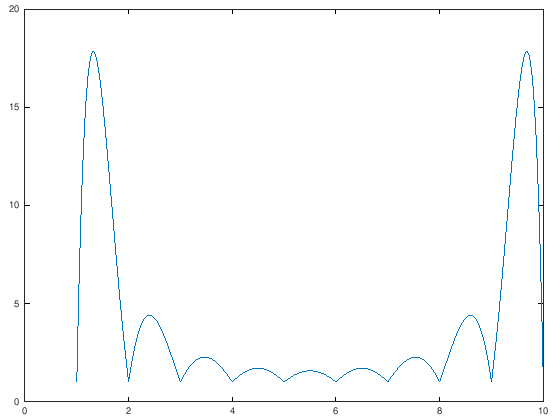

In [10]:
% ./Biblioteca/lebesgue.m

clear all

function [lambda, M] = lebesgue(nodos, z)

    matriz = factLagrange(nodos);
    altura_matriz = length(matriz(:, 1));

    vect_M = []; % vector que para cada i evalua L_i(x) y almacena el máximo valor encontrado en la posición i de vectM.

    evaluacion = zeros(altura_matriz, length(z));

    for i = 1:altura_matriz
        evaluacion(i, :) = abs(polyval(matriz(i, :), z));   % evaluamos los nodos z en L_i y guardamos el resultado en 
                                                            % valor absoluto.
        vect_M(i) = max(evaluacion(i, :));  % guardamos el máximo de los L_i(z) para cada i=1:altura_matriz.
    endfor

    M = sum(vect_M);    % sum(A): si A es un vector, devuelve la suma de los componentes del vector.

    lambda = sum(evaluacion);   % sum(A): si A es una matriz, devuelve un vector con la suma por columnas de la matriz.

endfunction

x = linspace(1, 10, 10);
z = linspace(1, 10, 1000);

[lambda_n, num_m] = lebesgue(x, z);

plot(z, lambda_n)
num_m

### Apartado 2:

En el script **Ejercicio3_1.m** debes dibujar las gráficas de $\varLambda _n$ para los nodos consistentes en $n + 1$ puntos equiespaciados en el intervalo $[-1, 1]$, y $n$ debe tomar los valores $5, 10, 15, 20$. Cada gráfica debe aparecer en una ventana diferente.

#### Solución:

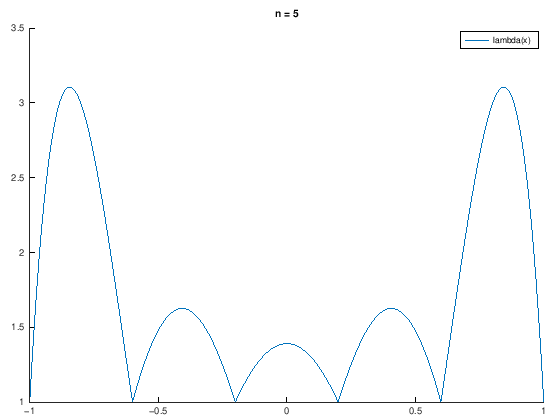

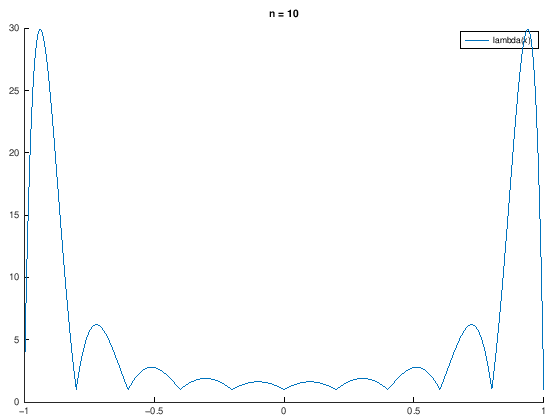

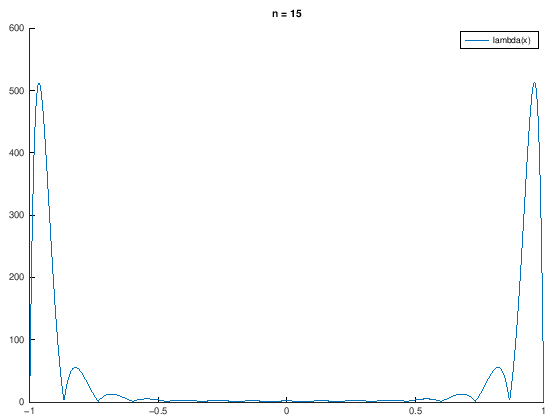

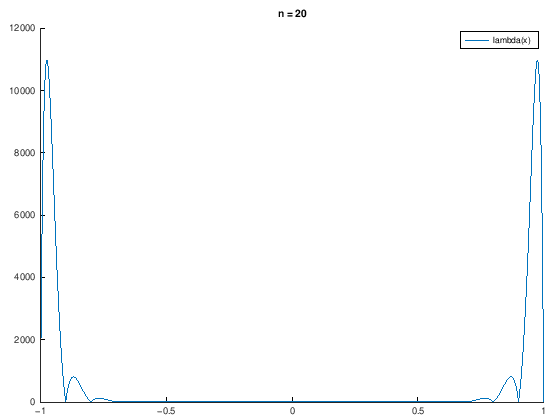

In [11]:
% ./Ejercicio3_1.m

clear all

n = [5, 10, 15, 20];
interval = linspace(-1, 1, 1000);

for i=1:length(n)
    nodos = linspace(-1, 1, n(i) + 1);
    [lambda_n, num_m] = lebesgue(nodos, interval);

    figure(i)
    hold on
    plot(interval, lambda_n, ';lambda(x);')
    title(sprintf('n = %u', n(i)))
    hold off

endfor

### Apartado 3:

En el script Ejercicio3_2.m debes dibujar las gráficas de $M _n$ respecto a $n$: en una gráficapara $n$ desde 1 hasta 9, en la segunda desde 1 hasta 19 (con los nodos del apartado anterior). Comenta lo que consideres opotuno sobre el crecimientode $M _n$ respecto a $n$.

#### Solución :

En un primer vistazo parece que $M_n$ crece exponencialmente comforme $n$ va creciendo.

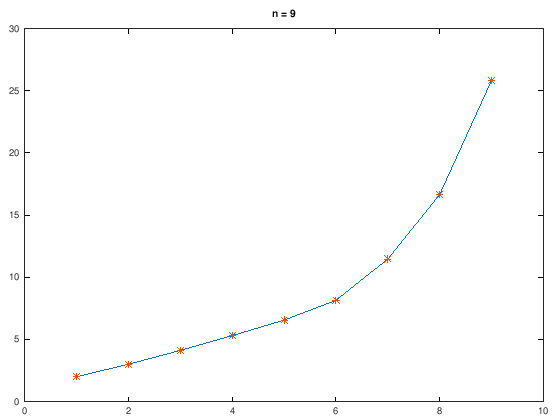

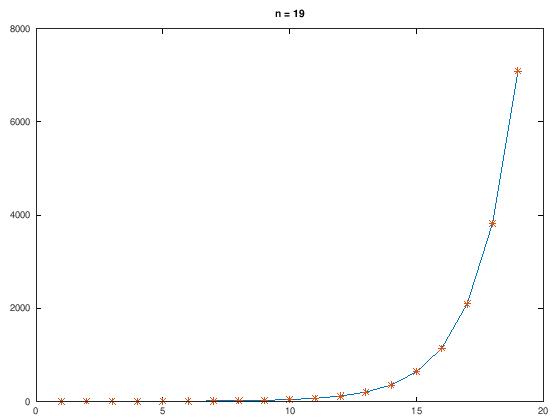

In [12]:
% ./Ejercicio3_2.m

clear all

n = [9, 19];
z = linspace(-1, 1, 1000);

for i=1:length(n)
    for j=1:n(i)
        nodos = linspace(-1, 1, j+1);
        [lambda_n, num_m] = lebesgue(nodos, z);
        M(j) = num_m;
    endfor
    interval = linspace(1, n(i), n(i));
    figure(i)
    plot(interval, M, interval, M, '*')
    title(sprintf('n = %u', n(i)))
    hold off
endfor

### Apartado 4:

En el script **Ejercicio3_3.m** vamos a simular mediante un modelo la estimación de los errores de redondeo. Para ello perturbaremos los datos para la función seno mediante valores pequeños de forma aleatoria. Consideramos $N + 1$ puntos equiespaciados del intervalo $[−1, 1]$, es decir, $x_k = -1 + \frac{2}{N}k, k=0,..., N$. Debes realizar las tareas siguientes para $N = 8$ y $N = 14$.

#### 4.a:

Generamos un conjunto de $N$ valores aleatorios $u_k$, tales que $\vert u_k\vert \leq 0.01$. Para ello utilizamos la función de Octave **rand(p,q)** que genera una matriz $p\times q$ de números aleatorios pertenecientes al intervalo $(0, 1)$. En nuestro caso generamos **w=rand(1,N+1)** y para que los números aleatorios verifiquen $\vert u_k\vert \leq 0.01$ les aplicamos la transformación $u = −0.01 + 0.02 ∗ w$.

In [47]:
% ./Ejercicio3_3.m

clear all

N = [8, 14];
maximo = max(N) + 1;
valores = zeros(length(N), maximo);

for i=1:length(N)
    w = rand(1, N(i) + 1);
    u = (-0.01) + 0.02 .* w;
    diferencia(i) = maximo - length(u);
    valores(i,:) = [u, zeros(1, diferencia(i))];
endfor

#### 4.b:

Construimos el polinomio interpolador $p_N$ en los puntos $\{(x_i,\sin(x_i))\}_{i=0}^N$ y el polinomio interpolador  $\tilde{p}_N$ en los puntos $\{(x_i, z_i)\}_{i=0}^N$, siendo $z_j = \sin(x_j) + u_j$; así pues estamos perturbando ligeramente los valores de la función seno en los nodos.

In [50]:
function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

coeficientes = zeros(length(N), 2, maximo);

for i=1:length(N)
    abcisas = linspace(-1, 1, N(i)+1);
    x = abcisas;
    y = sin(abcisas);
    z = [sin(abcisas), zeros(1, diferencia(i))] + valores(i, :);
    z((N(i)+2: end)) = [];

    coef1 = Lagrange(x, y);
    coeficientes(i, 1, :) = [zeros(1, diferencia(i)), coef1];

    coef2 = Lagrange(x, z);
    coeficientes(i, 2, :) = [zeros(1, diferencia(i)), coef2];
endfor

%% En este momento tenemos guardados los coeficientes de los polinomios interpoladores en la matriz de dimensión 3
%% que hemos llamado coeficientes. Además estan ordenados de manera decreciente, con el vector completado por delante
%% con ceros hasta el el coeficiente de mayor grado del polinomio.
%% De esta manera, tenemos que para n=9, (n(1)) los coeficientes del polinomio interpolador con 'y' se encontrarán en 'coeficientes(1,1,:)',
%% mientras que los del polinomio interpolador con 'z' se encuentran en 'coeficientes(1,2,:)'.


#### 4.c:

Calcula el máximo de la diferencia $\vert p_N(x) - \tilde{p}_N(x) \vert$ en una malla de puntos en el intervalo $[−1, 1]$ suficientemente fina. Compara esta diferencia máxima con el valor $0.01\cdot M_N$ que es la máxima desviación esperada. Comenta lo que consideres oportuno sobre el ejercicio.

Para 8 nodos:
dif_max = 0.030110
desv_max_esp = 0.1665

Para 14 nodos:
dif_max = 0.2911
desv_max_esp = 3.5424



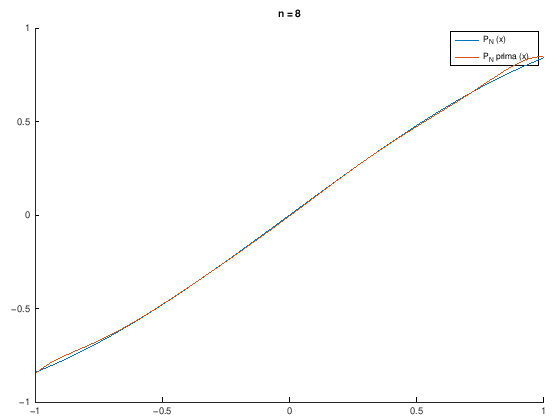

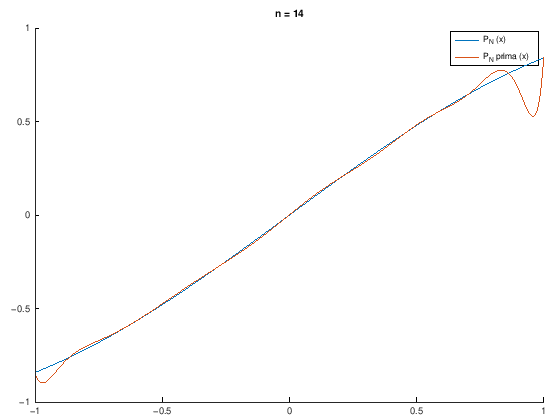

In [51]:
interval = linspace(-1, 1, 1000);

for i=1:length(N)

    nodos = linspace(-1, 1, N(i) + 1);

    for j=1:maximo
        coef1(j) = coeficientes(i, 1, j);
        coef2(j) = coeficientes(i, 2, j);
    endfor

    py = polyval(coef1, interval);
    pz = polyval(coef2, interval);

    [lambda, M] = lebesgue(nodos, interval);

    disp(sprintf('Para %u nodos:', N(i)))
    dif_max = max(abs(py-pz))
    desv_max_esp = 0.01 * M
    printf('\n')

    figure(i)
    title(sprintf('n = %u', N(i)))
    hold on
    plot(interval, py, ';P_N (x);')
    hold on
    plot(interval, pz, ';P_N prima (x);')
    hold off
endfor
